In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## EJERCICIO 1) Importance Sampling

#### 1) a) Utilice el algoritmo de Metrópolis para muestrear la distribución normal en una dimensión. Estudie el porcentaje de aceptación de movimientos y la función de correlación en función del tamaño del paso de exploración $\delta$

Muestramos la guassiana teórica y gráficamos un histograma de los puntos del muestro, graficados sobre una gaussiana
$$N(0,1) = \frac{1}{\sqrt{2 \pi}}e^{-\frac{x^2}{2}}$$

In [4]:
os.chdir(r'C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional\TP2-Computacional-Ising\Ejercicio 1')
A = np.loadtxt('imp-samp-x0.txt')

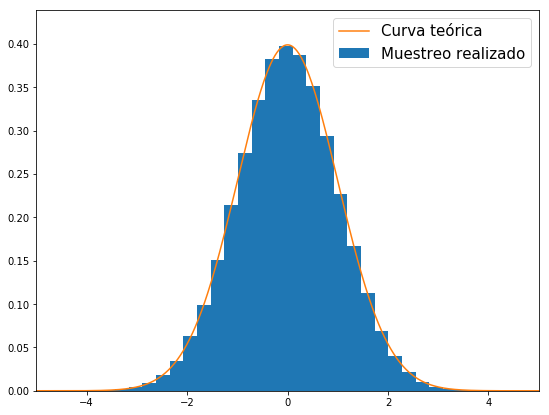

In [6]:
f = lambda x: (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
x = np.linspace(-10,10,1000)

#gaussiana muestreada
plt.figure(figsize = (9,7))
plt.hist(A[:,0],bins = 50, 
         density = True,
         label = 'Muestreo realizado')
plt.plot(x,f(x), label = 'Curva teórica')
plt.axis([-5,5,0,1.1*np.max(f(x))])
plt.legend(fontsize = 15)

###### Estudio del porcentaje de aceptación de movimientos en función de $\delta$

In [7]:
B = np.loadtxt('IMP-SAMP-ACEPTvsDELTA.txt')

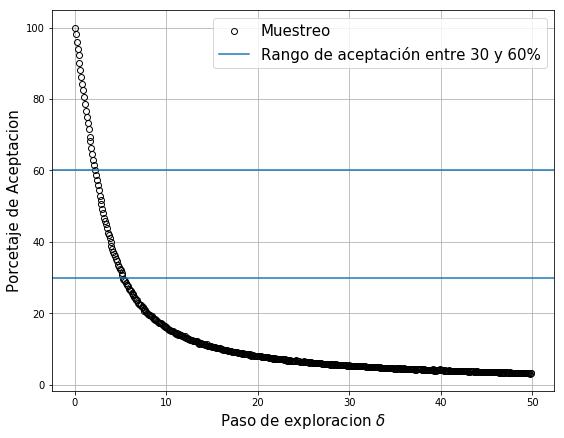

In [11]:
plt.figure(figsize = (9,7))
plt.plot(B[:,0],100*B[:,1],
         'ko',
         fillstyle = 'none',
         label = 'Muestreo')
plt.xlabel('Paso de exploracion $\delta$', fontsize = 15)
plt.ylabel('Porcetaje de Aceptacion',fontsize = 15)
plt.axhline(30, label = 'Rango de aceptación entre 30 y 60%')
plt.axhline(60)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 15)
plt.grid()

###### Estudio de la correlación en función del paso de exploración $\delta$

Método 1) Generando varios vectores de pasos y promediando las correlaciones de todos

In [15]:
A = np.loadtxt('CorrelacionVSdelta_a.txt')

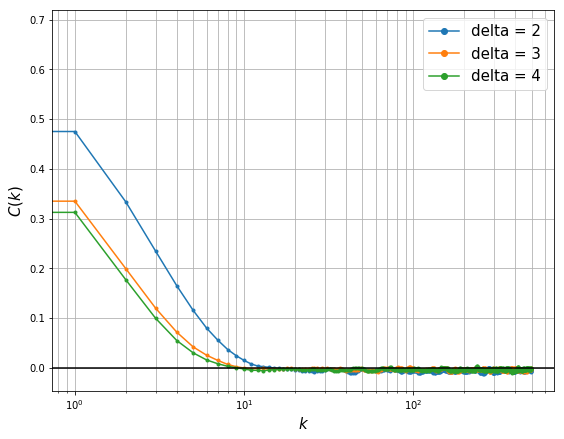

In [23]:
plt.figure(figsize = (9,7))
for i in range(len(A[:,0])):
    plt.plot(A[i,1:],'.-', label = "delta = %i" % (i+2))
plt.xscale('log')
plt.legend(fontsize = 15, markerscale = 2)
plt.axhline(0,color = 'k');
plt.grid(True, which = 'both');
plt.xlabel('$k$', fontsize = 15);
plt.ylabel('$C(k)$', fontsize = 15);

Notar 2 cosas: 

1) Los puntos no empiezan en 1: Porque se usa escala log, en escala lineal empiezan de 1.

2) La correlación se vuelve en promedio negativa. Esto puede ser por: Problemas de redondeo + el hecho de usar numeros pseudoaleatorios. 

Método 2) Generando un vector de pasos largo, partiéndolo en partes iguales y calculándole el $C(k)$ a cada parte para luego promediar. Se observan los mismos fenómenos que en el caso anterior y cualitativamente los gráficos son iguales

In [24]:
A = np.loadtxt('CorrelacionVSdelta_b.txt')

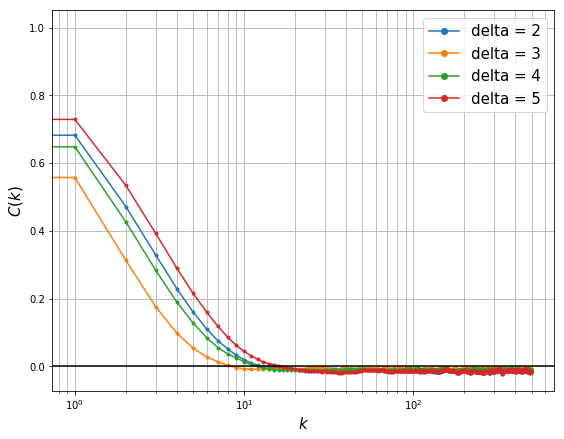

In [26]:
plt.figure(figsize = (9,7))
for i in range(len(A[:,0])):
    plt.plot(A[i,1:],'.-', label = "delta = %i" % (i+2))
plt.xscale('log')
plt.legend(fontsize = 15, markerscale = 2)
plt.axhline(0,color = 'k');
plt.grid(True, which = 'both');
plt.xlabel('$k$', fontsize = 15);
plt.ylabel('$C(k)$', fontsize = 15);

#### 1) b) Utilice el muestreo generado para calcular 

$$ I = \int\limits_{-\infty}^{\infty} dx\, x^2\, e^{-\frac{x^2}{2}}$$

#### Estudie la dependencia del resultado con el tiemo de termalización y con el tamaño del muestreo.

In [28]:
A = np.loadtxt('IMP-SAMP-x0.txt')

In [29]:
#la integral, cuyo resultado es \sigma^2
sigma_cuadrado = sum(A[:,0]**2)/len(A[:,0])
print("sigma cuadrado es igual a %f" % sigma_cuadrado)
del A, sigma_cuadrado

sigma cuadrado es igual a 0.998319


In [30]:
A = np.loadtxt('TtermalizacionVSdelta.txt')

[0, 3000, -1, 3]

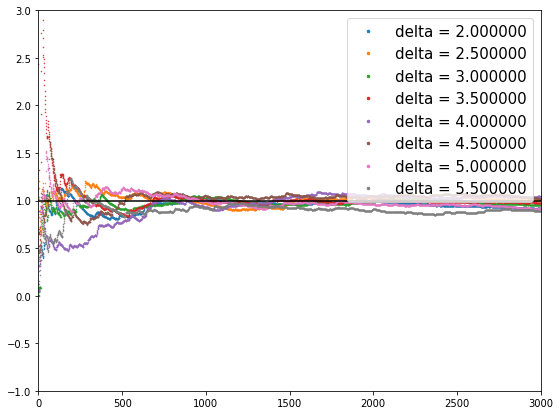

In [38]:
#la dependencia con el tiempo de termalizacion y el tamaño de muestreo
plt.figure(figsize = (9,7))
for i in range(len(A[:,0])):
    plt.plot(A[i,1:],'.', markersize = 1, label = "delta = %f" % A[i,0] )
plt.legend(fontsize = 15,markerscale = 5, loc = 'upper right')
plt.axhline(1,color = 'k')
plt.axis([0,3000,-1,3])

Se observan las curvas obtenidas para muestreos con diferentes valores de $\delta$, aproximadamente los correspondientes a donde se obtiene entre el 30% y 60% de aceptación de pasos. No se ve claramente para qué valor de $\delta$ la curva se aproxima más rapido al valor esperado 1, pero se ve que en promedio, para todos los delta muestreados, luego de los primeros 1000 pasos los valores alcanzan su estado estacionario.

## EJERCICIO 2) Ising 2D

#### Considere un arreglo cuadrangular de spines $s_{i} = \pm 1$ con condiciones periódicas de contorno. El Hamiltoniano del sistema está dado por

\begin{equation}
    H 
    = -J \sum\limits_{\langle i,j \rangle}
    s_{i}s_{j}
    -B\sum\limits_{i}s_{i} 
\end{equation}

###### 2)a) Si $J = 0$, obtener las expresiones analíticas de las variables termodinámicas y compare con los resultados de las simulaciones

Las variables termodinámicas, son, en rigor:

$\langle s_{i} \rangle = \frac{M}{N} = \frac{\langle M \rangle}{N} = \tanh{(\beta\,B)}$

$\langle \epsilon_{i} \rangle = \frac{E}{N} = \frac{\langle E \rangle}{N} = \frac{U}{N} = - B\tanh{(\beta\,B)}$

$\chi = \frac{\langle M^2 \rangle - \langle M \rangle^2}{kT^2} =\frac{N\beta}{\cosh^{2}(\beta B)}$

$C_{v} = \frac{\langle E^2 \rangle - \langle E \rangle^2}{kT^2} = \frac{Nk (\beta B)^2}{ \cosh^{2}{(\beta B)}}$,

aunque para este punto me dijo Facu que la única relevante es $M$. Si hay tiempo hacemos $C$ y $\chi$

In [39]:
os.chdir(r'C:\Users\igna\Desktop\Igna\Facultad\Fisica computacional\TP2-Computacional-Ising\Ejercicio 2')

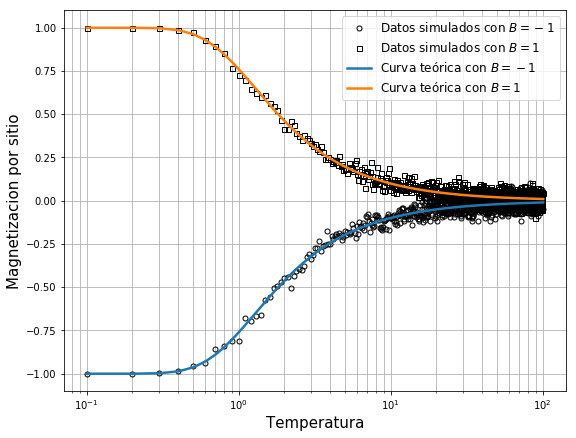

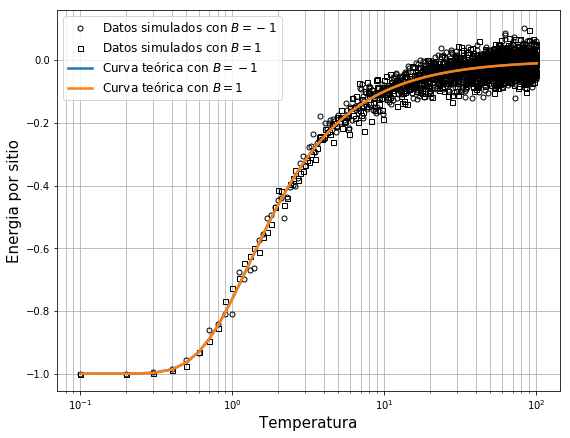

In [44]:
#%%
A_neg = np.loadtxt("MvsT_dim32_Bneg1.0_Pasos1000.txt")
A_pos = np.loadtxt("MvsT_dim32_Bpos1.0_Pasos1000.txt")  
np.shape(A) 
T = np.linspace(0.1,101,1000)
Mag = lambda x,B: np.tanh(B/x)
Ener = lambda x,B: -B*np.tanh(B/x)

plt.figure(figsize = (9,7))
plt.plot(A_neg[:,0],A_neg[:,1],'ko', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=-1$")
plt.plot(A_pos[:,0],A_pos[:,1],'ks', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=1$")
plt.plot(T,Mag(T,-1), linewidth = 2.5, label = "Curva teórica con $B = -1$")
plt.plot(T,Mag(T,1), linewidth = 2.5, label = "Curva teórica con $B = 1$")

plt.xscale('log')
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("Magnetizacion por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')


plt.figure(figsize = (9,7))
plt.plot(A_neg[:,0],A_neg[:,2],'ko', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=-1$")
plt.plot(A_pos[:,0],A_pos[:,2],'ks', markersize = 5,fillstyle = "none", label = "Datos simulados con $B=1$")
plt.plot(T,Ener(T,-1), linewidth = 2.5, label = "Curva teórica con $B = -1$")
plt.plot(T,Ener(T,1), linewidth = 2.5, label = "Curva teórica con $B = 1$")

plt.xscale('log')
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("Energia por sitio", fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True, which = 'both')

Estos son, respectivamente, graficos de magnetización media por sitio $M/N$ en función de la temperatura, para $B$ tanto positivo como negativo, graficados contra la función obtenida teóricamente; y la energía media por sitio $E/N$

Estos gráficos corresponden a simulaciones sobre redes de 32x32 con 1000 barridos totales sobre la red, para cada temperatura (el nombre del .txt indica esos parámetros)

###### 2)b) Si $B = 0$, y $L = 32$, estudiar el comportamiento del sistema para $J \in [0.1, 0.6]$. Estudiar la frecuencia de sampleo adecuada para cada constante de acoplamiento viendo las correlaciones.